## Load patents data

In [1]:
## Inputs
import dill as pickle
from datetime import datetime
from collections import OrderedDict
import time
with open(r"C:\Users\amusali\Desktop\uc3m PhD\05 Analysis\01 Main\00 Python data\03 Cleaned patents\all_patents.pkl", 'rb') as f:
    patents = pickle.load(f)

#with open(r"C:\Users\amusali\Downloads\Motorola Mobility LLC_2012-05-21_before_0135.pkl", "rb") as file:
  #  motorola = pickle.load(file)

#for patent in motorola:
   # patent.date_acquired = datetime(2012, 5, 21)

#patents = patents + motorola
import matplotlib.pyplot as plt
import numpy as np


In [2]:
for patent in motorola:
    patent.date_acquired = datetime(2012, 5, 21)

### Checks

In [3]:
citedby = [patent for patent in patents if patent.citedby_patents is not None]
print(len(citedby))


for patent in patents:
    if patent.citedby_patents is None:
        assert patent.forward_citations ==0 or patent.forward_citations is None, f"No citations, but forward citations: {patent.forward_citations}"

    if patent.forward_citations is None or patent.forward_citations == 0:
        assert patent.citedby_patents is None, f"Forward citations, but no citations: {patent.citedby_patents}"
        


5581


0 patents with no closest patent
3078 patents processed with citations
[0.42343096234309624, 0.40023990403838466, 0.47338403041825095, 0.4217391304347826, 0.4309623430962343, 0.3926771918038294, 0.4330734243014945, 0.4551656920077973, 0.5116959064327485, 0.5042235217673814, 0.5048732943469786, 0.51364522417154, 0.583170890188434]
[0.5417743324720069, 0.5042909685328975, 0.623008161678974, 0.5870920425375871, 0.504047870468145, 0.5052417991207304, 0.5480831708901884, 0.52046783625731, 0.5357374918778428, 0.6078622482131254, 0.5877192982456141, 0.6244314489928525, 0.6283300844704354]
{-6: 2390, -5: 2501, -4: 2630, -3: 2760, -2: 2868, -1: 2977, 0: 3078, 1: 3078, 2: 3078, 3: 3078, 4: 3078, 5: 3078, 6: 3078}
{-6: 2322, -5: 2447, -4: 2573, -3: 2727, -2: 2841, -1: 2957, 0: 3078, 1: 3078, 2: 3078, 3: 3078, 4: 3078, 5: 3078, 6: 3078}


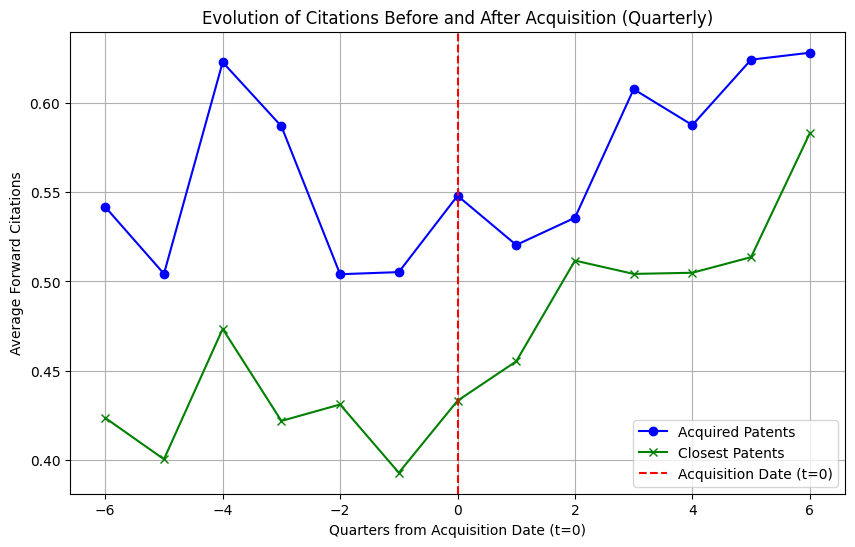

{'ART19, Inc.',
 'Actifio, Inc.',
 'Adometry, Inc.',
 'Affirmed Networks, Inc.',
 'America Online, Inc.',
 'American Well Corporation',
 'Anvato, Inc.',
 'Apigee Corporation',
 'Apple Computer Inc.',
 'Applied Semantics, Inc.',
 'Audible, Inc.',
 'Banyan Systems, Inc.',
 'Beats Electronics, LLC',
 'BlueStripe Software, Inc.',
 'BlueTalon, Inc.',
 'CNEX LABS, Inc.',
 'CTRL-labs Corporation',
 'CUE INC.',
 'Canesta, Inc.',
 'Canvas Technology, Inc.',
 'Channel Intelligence, Inc.',
 'Chomp, Inc.',
 'CloudKnox Security, Inc.',
 'Coherent Navigation, Inc.',
 'Convergence. Com',
 'Cycle Computing, LLC',
 'Danger, Inc.',
 'Dialogic Corporation',
 'DoubleClick Inc.',
 'E-Stamp Corporation',
 'EYEFLUENCE, INC.',
 'Elemental Technologies, Inc.',
 'Emotient, Inc.',
 'Entropic Systems, Inc.',
 'FITBIT, INC.',
 'FSLOGIX, INC.',
 'Flyby Media, Inc.',
 'FortyTwo, Inc.',
 'Fungible, Inc.',
 'GITHUB, INC.',
 'General Magic',
 'Geoworks Corporation',
 'Groove Networks, Inc.',
 'HOPSTOP.COM, INC.',
 'INT

In [67]:
import random
#list_patents = [p for p in patents if p.assignee_organization == 'Nuance Communications, Inc.' and p.forward_citations > -10]

plot_citation_evolution_adjustable(patents, upper_lower_bound=6, implied_days=91, threshold=0, cs_threshold=0, citation_threshold=0)

### Function to plot evolution of citations

In [28]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


def plot_citation_evolution_adjustable(patents, upper_lower_bound=5, implied_days=0, threshold=365, cs_threshold = 0.5, citation_threshold = 0):
    no_closest_patent_counter = 0
    no_cited_patent_counter = 0
    patents_with_citation = 0

    assignees = set()

    # Define the time range dynamically
    time_range = (-upper_lower_bound, upper_lower_bound)
    
    # Initialize dictionaries to store cumulative citation counts and patent counts per quarter
    patent_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
    patent_count_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
    closest_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
    closest_count_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}

    #print("Processing", len(patents), "patents")
    for i, patent in enumerate(patents):

        # Skip if it has less citation than threshold
        if patent.forward_citations <= citation_threshold: continue
        if patent.cosine_similarity_with_closest_patent is None: continue
        if patent.cosine_similarity_with_closest_patent < cs_threshold:
            continue
        #print(f"Processing patent {i + 1} of {len(patents)}")  # Print progress
        date_acquired = patent.date_acquired
        
        # Ensure each patent's closest patent has citations, else skip
        if patent.closest_patent is None:
            no_closest_patent_counter += 1
            continue


        # Calculate time bounds around acquisition date
        time_to_acquisition_patent = (patent.date_granted - date_acquired).days // implied_days
        time_to_acquisition_closest = (patent.closest_patent.date_granted - date_acquired).days // implied_days

        # Skip patents without balanced panel (1 year of data before acquisition)
        if time_to_acquisition_patent > -threshold // implied_days or time_to_acquisition_closest > -threshold // implied_days:
            continue
        
        assignees.add(patent.assignee_organization)
        for key, value in patent_count_by_time.items():
            if key >= time_to_acquisition_patent:
                patent_count_by_time[key] += 1

        for key, value in closest_count_by_time.items():
            if key >= time_to_acquisition_closest:
                closest_count_by_time[key] += 1

        # Process citation data for each patent and its closest patent within time bounds
        for cited_patent in patent.citedby_patents:
            t_patent = (cited_patent.date_granted - date_acquired).days // implied_days
            if time_range[0] <= t_patent <= time_range[1]:
                patent_citations_by_time[t_patent] += 1  # Increment citation count for time point
                #patent_count_by_time[t_patent] += 1  # Track patents with citations for averaging

        for cited_patent in patent.closest_patent.citedby_patents:
            t_closest = (cited_patent.date_granted - date_acquired).days // implied_days
            if time_range[0] <= t_closest <= time_range[1]:
                closest_citations_by_time[t_closest] += 1  # Increment citation count for closest patent
                #closest_count_by_time[t_closest] += 1

        patents_with_citation += 1

    print(f"{no_closest_patent_counter} patents with no closest patent")
    print(f"{patents_with_citation} patents processed with citations")

    # Calculate average citations per quarter for acquired and closest patents
    avg_patent_citations = [
        patent_citations_by_time[t] / patent_count_by_time[t] if patent_count_by_time[t] > 0 else 0
        for t in range(time_range[0], time_range[1] + 1)
    ]
    avg_closest_citations = [
        closest_citations_by_time[t] / closest_count_by_time[t] if closest_count_by_time[t] > 0 else 0
        for t in range(time_range[0], time_range[1] + 1)
    ]

    print(avg_closest_citations)
    print(avg_patent_citations)
    print(closest_count_by_time)
    print(patent_count_by_time)
    # Plotting results
    time_points = list(range(time_range[0], time_range[1] + 1))
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, avg_patent_citations, label='Acquired Patents', marker='o', color='blue')
    plt.plot(time_points, avg_closest_citations, label='Closest Patents', marker='x', color='green')
    
    # Center line at acquisition date (t=0)
    plt.axvline(x=0, color='red', linestyle='--', label='Acquisition Date (t=0)')
    plt.title("Evolution of Citations Before and After Acquisition (Quarterly)")
    plt.xlabel("Quarters from Acquisition Date (t=0)")
    plt.ylabel("Average Forward Citations")
    plt.legend()
    plt.grid(True)
    plt.show()

    return assignees


## PLot - fixed center date

In [ ]:

center_date=datetime(2016, 12, 7)
no_closest_patent_counter = 0
no_cited_patent_counter = 0
patents_with_citation = 0

upper_lower_bound = 8
implied_days = 365
threshold = 365
# Initialize dictionaries to hold citation counts for each time point (quarters)

time_range=(-upper_lower_bound, upper_lower_bound)
patent_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
patent_count_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
closest_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
closest_count_by_time =  {t: 0 for t in range(time_range[0], time_range[1] + 1)}

print("there are", len(patents), "patents")
for patent in patents:
    if patent.cosine_similarity_with_closest_patent is not None:
        if patent.cosine_similarity_with_closest_patent < 0.6:
            continue
    #if patent.forward_citations  == 0 or not patent.forward_citations or patent.closest_patent.forward_citations == 0 or not patent.closest_patent.forward_citations :
       # no_cited_patent_counter += 1
        #continue
    if (patent.date_granted - center_date).days > -threshold or (patent.closest_patent.date_granted - center_date).days > -threshold:
        #print("BEFORE THE ANALYSIS Period")
        continue
    #if -(patent.date_granted - center_date).days < upper_lower_bound * implied_days:
      # print("Too close to the acquistion")
        #continue
    if patent.closest_patent is None:
        print('None closes patent')
        no_closest_patent_counter +=1
        continue

    #print("Closest patent assignee is: ", patent.closest_patent.assignee_organization)
    # Check if the patent has any citedby_patents
    if patent.citedby_patents:
        for cited_patent in patent.citedby_patents:
            #print(cited_patent.date_granted)
            # Calculate time difference (in quarters) from the center date
            t_patent = (cited_patent.date_granted - center_date).days // implied_days  # Approx. 91 days in a quarter
            #print(t_patent)
            if time_range[0] <= t_patent <= time_range[1]:
                patent_citations_by_time[t_patent] += 1  # Add 1 citation for this quarter
    time_to_acquisition = (patent.date_granted - center_date).days // implied_days
    
    for key, value in patent_count_by_time.items():
        if key >= time_to_acquisition:
            patent_count_by_time[key] += 1
    # Check if the closest patent exists and has any citedby_patents
    if patent.closest_patent and patent.closest_patent.citedby_patents:
        for cited_patent in patent.closest_patent.citedby_patents:
            t_closest = (cited_patent.date_granted - center_date).days // implied_days  # Time difference in quarters
            if time_range[0] <= t_closest <= time_range[1]:
                closest_citations_by_time[t_closest] += 1 # Add 1 citation for this quarter

    time_to_acquisition = (patent.closest_patent.date_granted - center_date).days // implied_days
    
    for key, value in closest_count_by_time.items():
        if key >= time_to_acquisition:
            closest_count_by_time[key] += 1

    patents_with_citation += 1

print(f"There are {no_closest_patent_counter} patents with no closest patent")
print(f"patents with no citation: {no_cited_patent_counter}")   
print(f"paetnts with citation : {patents_with_citation}")

print(patent_citations_by_time)
print(closest_citations_by_time)
print(patent_count_by_time)
print(closest_count_by_time)

# Calculate average citations for each time point (quarter)
avg_patent_citations = [patent_citations_by_time[t]/patent_count_by_time[t] for t in range(time_range[0], time_range[1] + 1)]
avg_closest_citations = [closest_citations_by_time[t]/closest_count_by_time[t] for t in range(time_range[0], time_range[1] + 1)]




# Create the x-axis (time points in quarters)
time_points = list(range(time_range[0], time_range[1] + 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, avg_patent_citations, label='Acquired Patents', marker='o', color='blue')
plt.plot(time_points, avg_closest_citations, label='Closest Patents', marker='x', color='green')

# Highlight t=0 (acquisition date)
plt.axvline(x=0, color='red', linestyle='--', label='Acquisition Date (t=0)')

plt.title("Evolution of Total Citations Before and After Acquisition (Quarterly)")
plt.xlabel("Quarters from Acquisition (t=0)")
plt.ylabel("Total Forward Citations")
plt.xticks(np.arange(time_range[0], time_range[1] + 1), labels=[f"{i}" for i in range(time_range[0], time_range[1] + 1)])
plt.legend()
plt.grid(True)
plt.show()





In [2]:
import numpy as np

In [6]:
non = [patent for patent in patents if patent.closest_patent is not None]

In [15]:
for patent in non:
    if patent.cosine_similarity_with_closest_patent is None:
        continue
    if patent.cosine_similarity_with_closest_patent > 0.95 and patent.cosine_similarity_with_closest_patent < 0.99:
        print(patent.abstract)
        print(patent.closest_patent.abstract
              )

A system and method for printing a postage meter stamp, including a desired postage amount and encrypted information, onto a piece of mail. A user takes a postal storage device to the post office in order to obtain a replenishment of the amount of postage stored within the postage storage device. A desired amount of postage is entered into the storage device by a postal employee through a processor-based system. The user is then able to access this stored postage at the user's location through a complementary processor-based system. The user's processor-based system automatically calculates the required postage for a piece of mail based upon a set of parameters pertaining to that piece of mail. Additional information, such as addresses, may also be printed onto an envelope, a label, a card, a letter, etc., along with the postage meter stamp through the use of a word processor program coupled to the present invention.
A system and method for printing a postage meter stamp, including a d

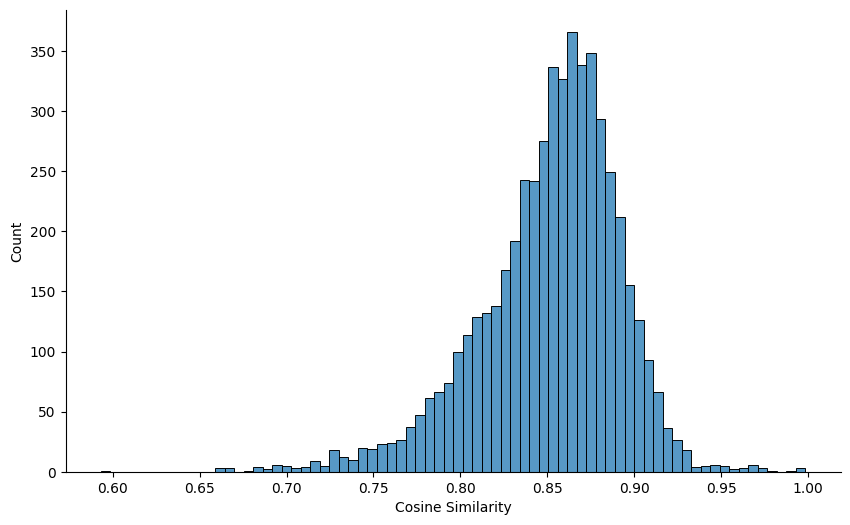

Number of patents with similarities calculated: 5245
Mean similarity: 0.8513
Median similarity: 0.8575
Min similarity: 0.5932
Max similarity: 0.9985


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
import seaborn as sns

# Calculate cosine similarities
cosine_similarities = []

for patent in patents:
    if patent.abstract == patent.closest_patent.abstract:
        continue
    if patent.date_acquired is not None:
        cosine_similarities.append(patent.cosine_similarity_with_closest_patent)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(cosine_similarities)
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
# Remove upper and right spines
sns.despine()

# Save the figure with high resolution
plt.savefig("cosine_similarity_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Print some statistics
print(f"Number of patents with similarities calculated: {len(cosine_similarities)}")
print(f"Mean similarity: {np.mean(cosine_similarities):.4f}")
print(f"Median similarity: {np.median(cosine_similarities):.4f}")
print(f"Min similarity: {np.min(cosine_similarities):.4f}")
print(f"Max similarity: {np.max(cosine_similarities):.4f}")


## Preliminary estimates

In [3]:
df = patents_to_quarterly_df(patents)

In [31]:
import stata_setup
from pystata import stata
stata_setup.config(path = r"C:\Program Files\Stata18" , edition = 'mp')

stata.pdataframe_to_data(df, force=True)

In [41]:


stata.run("destring matched_pair_id patent_id, replace")
stata.run("xtset patent_id quarters_to_acquired")

matched_pair_id already numeric; no replace


patent_id: all characters numeric; replaced as long


SystemError: repeated time values within panel
r(451);


In [23]:
t = [patents[34], patents[23]]
df = process_patent_objects(patents)
df.to_excel("processed_patents_quarterly.xlsx", index=False)

In [3]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np


def get_quarter_start(date):
    quarter = (date.month - 1) // 3 + 1  # Compute quarter
    start_month = (quarter - 1) * 3 + 1  # First month of the quarter
    return datetime(date.year, start_month, 1)  # First day of that month

def process_patent_objects(patents):
    data = []

    for patent in patents:
        acquisition_date = patent.date_acquired
        granted = False
        matched_pair_id = patent.patent_id  # Use the acquired patent's ID as the matched pair identifier

        ## Find the grant date of either the patent or its closest patent (whichever is earlier)
        first_grant_date = min(patent.date_granted, patent.closest_patent.date_granted)
        
        ## Create quarters
        start_date = min(patent.date_application, patent.closest_patent.date_application)
        end_date = datetime(2025, 2, 17)
        quarters = pd.date_range(start=start_date, end=end_date, freq='QE')  # Generates quarterly periods
        
        ## Calculate forward citations in each quarter
        for quarter in quarters:

            ### Define start and end dates of a given quarter
            quarter_start_date = get_quarter_start(quarter)
            quarter_end_date = quarter 

            if first_grant_date > quarter_end_date:
                continue

            ## Calculate forward citation in each quarter
            forward_citations = sum(
                1 for c in patent.citedby_patents
                if quarter_start_date <= c.date_granted <= quarter_end_date
            ) if patent.citedby_patents else 0

            if not granted and (patent.date_granted <= quarter_start_date or quarter_start_date <= patent.date_granted <= quarter_end_date):
                granted = True

            # Determine treatment status based on acquisition timing
            treated = 1 if quarter_start_date >= acquisition_date or quarter_start_date <= acquisition_date <= quarter_end_date else 0

            # Data for acquired patent
            acquired_row = {
                'matched_pair_id': matched_pair_id,
                'patent_id': patent.patent_id,
                'quarter_date_start': quarter_start_date,
                'quarter_end_date': quarter_end_date,
                'treatment': treated,
                'granted': granted,
                'grant_date': patent.date_granted,
                'acquired_date': acquisition_date,
                'assignee_organization': patent.assignee_organization,
                'assignee_country': patent.assignee_country,
                'forward_citations': forward_citations,
                'cosine_similarity_with_closest_patent': patent.cosine_similarity_with_closest_patent,
                'euclidean_distance_to_closest_patent': patent.euclidean_distance_to_closest_patent
            }

            data.append(acquired_row)

            # Data for closest patent (control)
            if patent.closest_patent:
                closest_forward_citations_in_quarter = sum(
                    1 for c in patent.closest_patent.citedby_patents
                    if quarter_start_date <= c.date_granted < quarter_end_date
                ) if patent.closest_patent.citedby_patents else 0

                granted_closest = patent.closest_patent.date_granted < quarter_start_date or quarter_start_date <= patent.closest_patent.date_granted <= quarter_end_date

                control_row = {
                    'matched_pair_id': matched_pair_id,
                    'patent_id': patent.closest_patent.patent_id,
                    'quarter_date_start': quarter_start_date,
                    'quarter_end_date': quarter_end_date,
                    'treatment': 0,
                    'granted': granted_closest,
                    'grant_date': patent.closest_patent.date_granted,
                    'acquired_date': 0,  # Use an empty cell
                    'assignee_organization': patent.closest_patent.assignee_organization,
                    'assignee_country': patent.closest_patent.assignee_country,
                    'forward_citations': closest_forward_citations_in_quarter,
                    'cosine_similarity_with_closest_patent': patent.cosine_similarity_with_closest_patent,
                    'euclidean_distance_to_closest_patent':  patent.euclidean_distance_to_closest_patent
                }

                data.append(control_row)

    df = pd.DataFrame(data)
    return df



# Example usage:
#df = process_patent_objects(patents)
# df.to_excel("patents_relative_quarterly_data.xlsx", index=False)


## Matching estimates

In [2]:
for patent in patents:
    print(patent.assignee_organization)#, matching_estimate(patent, 5, 5))

Stac Electronics, Inc.
Stac Electronics, Inc.
UUNet Technologies, Inc.
UUNet Technologies, Inc.
Individual, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.
Wang Laboratories, Inc.

In [7]:
estimates = []

#for year in range(1990, 2024):
#list_patents = [p for p in patents if p.assignee_organization == 'Nuance Communications, Inc.' and p.forward_citations >= 0]
for patent in patents:

    #if patent.date_acquired.year > 2021: continue
    
    # Get matching estimate
    if matching_estimate(patent, 16, 16) is not None:
        #if matching_estimate(patent, 16, 16) > 
        
        if patent.forward_citations is not None:# and patent.forward_citations >0:
            estimates.append(matching_estimate(patent, 8, 8))

clean = [e for e in estimates if e is not None]
# Calculate mean and variance
mean_estimate = np.mean(clean)
variance_estimate = np.var(clean)

# Print results
print(f"Average matching estimate: {mean_estimate:.3f}, Variance: {variance_estimate:.3f}, out of {len(clean)} patents")

Average matching estimate: 0.013, Variance: 1.414, out of 3661 patents


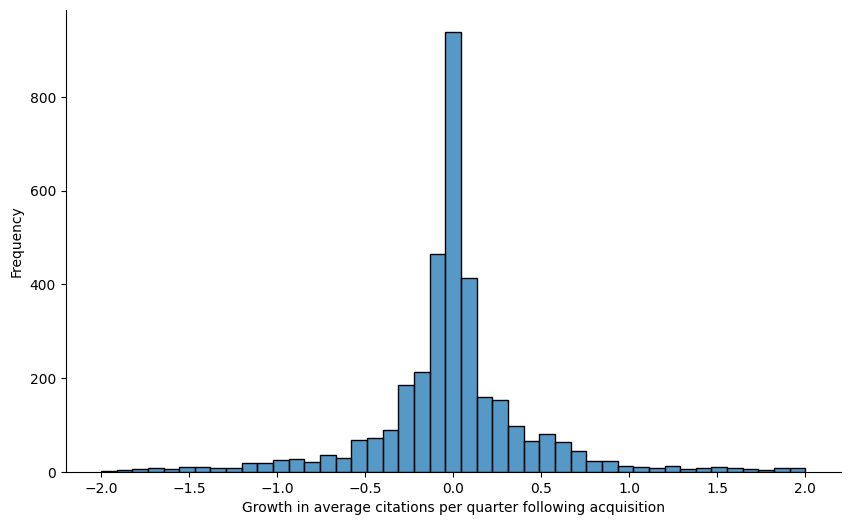

Number of matching estimates: 3661


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter non-None estimates
clean = [p for p in estimates if p is not None]

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the histogram using seaborn
sns.histplot(
    clean, 
    bins=45, 
    binrange=(-2, 2), 
    kde=False,  # Turn off kernel density estimate
    edgecolor='black'
)

# Customize the plot
sns.despine()  # Remove upper and right spines
plt.xlabel('Growth in average citations per quarter following acquisition')
plt.ylabel('Frequency')

# Save the figure in high resolution
plt.savefig("matching_estimates.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Print statistics
print(f"Number of matching estimates: {len(clean)}")


In [77]:
import pandas as pd

df = pd.DataFrame(clean, columns=['Matching Estimate'])
df.to_excel("matching_estimates.xlsx", index=False)

In [5]:
# Function to get matching estimator for any given patent:
from datetime import datetime, timedelta
def matching_estimate(patent, quarters_before, quarters_after):
    ## Skip the patent if it does not have a closest patent
    if not patent.closest_patent:
        #print("Patent does not have a closest patent, returning None!")
        return None
    
    # Get dates
    acquisition_date = patent.date_acquired
    grant_date = patent.date_granted
    start_date = grant_date - timedelta(days=quarters_before * 91)
    end_date = grant_date + timedelta(days=quarters_after * 91)

    if grant_date > acquisition_date:
        #print("Grant date is after acquisition date, returning None!")
        return None
    
    # Initialize the list of forward citations for the treatment/control group
    treatment_forward_citations = {}
    control_forward_citations = {}

    # Time from grant date to acquisition date
    if start_date< grant_date < acquisition_date:
       # print("Grant date is after the threshold but before the acquisition date, adjusting quarters before!")
        time_to_acquisition = (acquisition_date - grant_date).days
        quarters_before = np.ceil(time_to_acquisition/91)

    # Count forward citations before the acquisition date
    forward_citations_before = sum(
        1 for c in patent.citedby_patents 
        if start_date <= c.date_granted < acquisition_date
    ) if patent.citedby_patents else 0
    
    treatment_forward_citations['before'] = forward_citations_before/quarters_before

    # Count forward citations after the acquisition date
    forward_citations_after = sum(
        1 for c in patent.citedby_patents 
        if acquisition_date <= c.date_granted < end_date
    ) if patent.citedby_patents else 0

    treatment_forward_citations['after'] = forward_citations_after/quarters_after

    # Count forward citations before the acquisition date for the closest patent
    closest_forward_citations_before = sum(
        1 for c in patent.closest_patent.citedby_patents 
        if start_date <= c.date_granted < acquisition_date
    ) if patent.closest_patent.citedby_patents else 0
    
    control_forward_citations['before'] = closest_forward_citations_before/quarters_before

    # Count forward citations after the acquisition date for the closest patent
    closest_forward_citations_after = sum(
        1 for c in patent.closest_patent.citedby_patents 
        if acquisition_date <= c.date_granted < end_date
    ) if patent.closest_patent.citedby_patents else 0
    
    control_forward_citations['after'] = closest_forward_citations_after/quarters_after
    
    # Calculate the difference in forward citations for the treatment and control groups
    diff_after = treatment_forward_citations['after'] - control_forward_citations['after']
    diff_before = treatment_forward_citations['before'] - control_forward_citations['before']

    matching_estimate = diff_after - diff_before

    #Print the results
    #print(f"Patent ID: {patent.patent_id}")
    #print(f"Quarters before acquisition date: {quarters_before}")
    #print(f"Quarters after acquisition date: {quarters_after}")
    #print(f"Forward citations before acquisition date: {forward_citations_before}")
    #print(f"Forward citations after acquisition date: {forward_citations_after}")
    #print(f"Closest patent forward citations before acquisition date: {closest_forward_citations_before}")
    #print(f"Closest patent forward citations after acquisition date: {closest_forward_citations_after}")
    #print(f"Matching estimate: {matching_estimate}")

    return matching_estimate


